In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.rcParams['figure.figsize'] = (8,5)


In [44]:
df = pd.read_csv("/Users/pauloh/DSI_Assignments/ds_team5_diabetes/data/diabetes_data_upload.csv")


In [45]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [46]:
symptom_cols = [c for c in df.columns if c not in ["age", "gender", "class"]]


In [47]:
for col in symptom_cols:
    df[col] = df[col].astype(str).str.strip().str.lower().map({"yes": 1, "no": 0})


In [48]:
df["class"] = df["class"].str.strip().str.lower().map({"positive": 1, "negative": 0})


In [49]:
print(df[symptom_cols + ["class"]].head())


   polyuria  polydipsia  sudden_weight_loss  weakness  polyphagia  \
0         0           1                   0         1           0   
1         0           0                   0         1           0   
2         1           0                   0         1           1   
3         0           0                   1         1           1   
4         1           1                   1         1           1   

   genital_thrush  visual_blurring  itching  irritability  delayed_healing  \
0               0                0        1             0                1   
1               0                1        0             0                0   
2               0                0        1             0                1   
3               1                0        1             0                1   
4               0                1        1             1                1   

   partial_paresis  muscle_stiffness  alopecia  obesity  class  
0                0                 1         1     

In [50]:
print("\nNonzero check per column:")
print(df[symptom_cols].sum().sort_values(ascending=False).head(10))


Nonzero check per column:
weakness              305
polyuria              258
itching               253
delayed_healing       239
polyphagia            237
polydipsia            233
visual_blurring       233
partial_paresis       224
sudden_weight_loss    217
muscle_stiffness      195
dtype: int64


In [51]:
print("=== Descriptive Statistics ===\n")


=== Descriptive Statistics ===



In [52]:
# Age stats
print(f"Mean Age: {df['age'].mean():.1f} years")
print(f"Median Age: {df['age'].median():.1f} years")
print()

Mean Age: 48.0 years
Median Age: 47.5 years



In [53]:
# Gender distribution
gender_dist = df["gender"].value_counts(normalize=True).round(2) * 100
print("Gender Distribution (%):\n", gender_dist)
print()


Gender Distribution (%):
 gender
Male      63.0
Female    37.0
Name: proportion, dtype: float64



In [54]:
# Diabetes prevalence
diabetes_prevalence = df["class"].mean().round(2) * 100
print(f"Overall Diabetes Prevalence: {diabetes_prevalence}%\n")

Overall Diabetes Prevalence: 62.0%



In [55]:
# Symptom prevalence (overall)
symptom_prevalence = df[symptom_cols].mean().sort_values(ascending=False) * 100
print("Top 5 Most Common Symptoms Overall (%):\n", symptom_prevalence.head(5))

Top 5 Most Common Symptoms Overall (%):
 weakness           58.653846
polyuria           49.615385
itching            48.653846
delayed_healing    45.961538
polyphagia         45.576923
dtype: float64


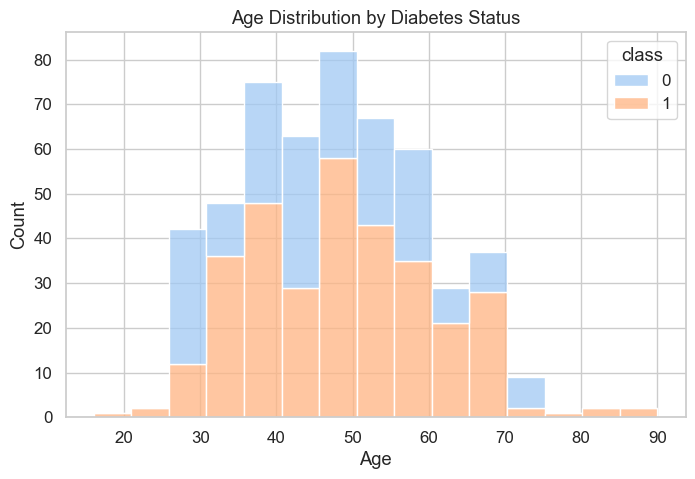

In [56]:
# Visualization: Age distribution
plt.figure()
sns.histplot(data=df, x="age", hue="class", multiple="stack", bins=15)
plt.title("Age Distribution by Diabetes Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

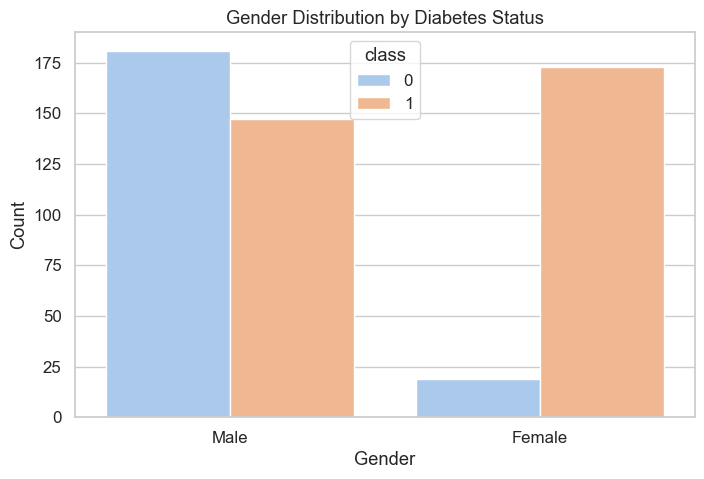

In [57]:
#  Visualization: Gender distribution 
plt.figure()
sns.countplot(data=df, x="gender", hue="class")
plt.title("Gender Distribution by Diabetes Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

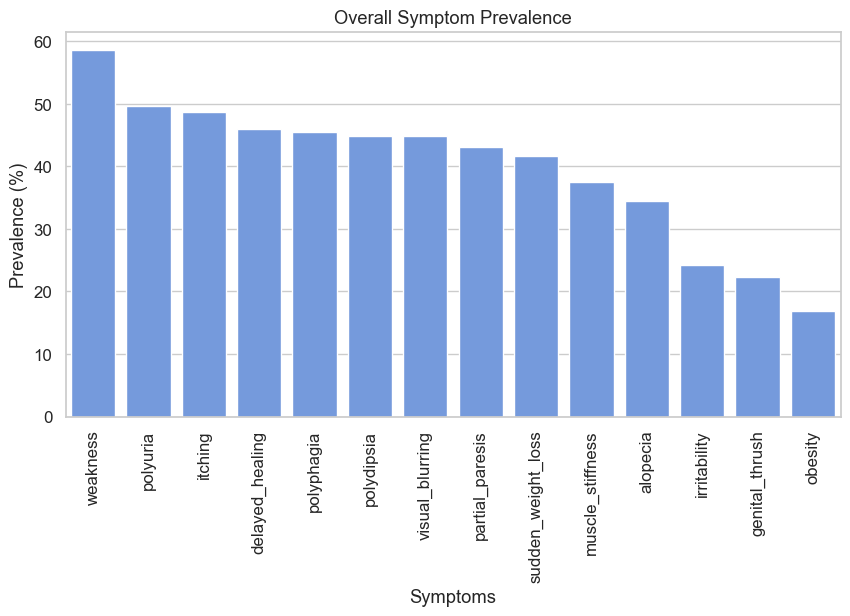

In [71]:
#  Visualization: Overall symptom prevalence 
plt.figure(figsize=(10,5))
sns.barplot(x=symptom_prevalence.index, y=symptom_prevalence.values, color="cornflowerblue")
plt.xticks(rotation=90)
plt.ylabel("Prevalence (%)")
plt.xlabel("Symptoms")
plt.title("Overall Symptom Prevalence")
plt.savefig("overall_symptom_prevelance.png", dpi=150)
plt.show()


In [59]:
print("\n=== Cross-tabulations ===\n")


=== Cross-tabulations ===



In [60]:
# Compare symptom frequencies between diabetic and non-diabetic
crosstab_class = df.groupby("class")[symptom_cols].mean().T * 100
crosstab_class.columns = ["Non-Diabetic (%)", "Diabetic (%)"]
display(crosstab_class.round(1))

,Non-Diabetic (%),Diabetic (%)
polyuria,7.5,75.9
polydipsia,4.0,70.3
sudden_weight_loss,14.5,58.8
weakness,43.5,68.1
polyphagia,24.0,59.1
genital_thrush,16.5,25.9
visual_blurring,29.0,54.7
itching,49.5,48.1
irritability,8.0,34.4
delayed_healing,43.0,47.8


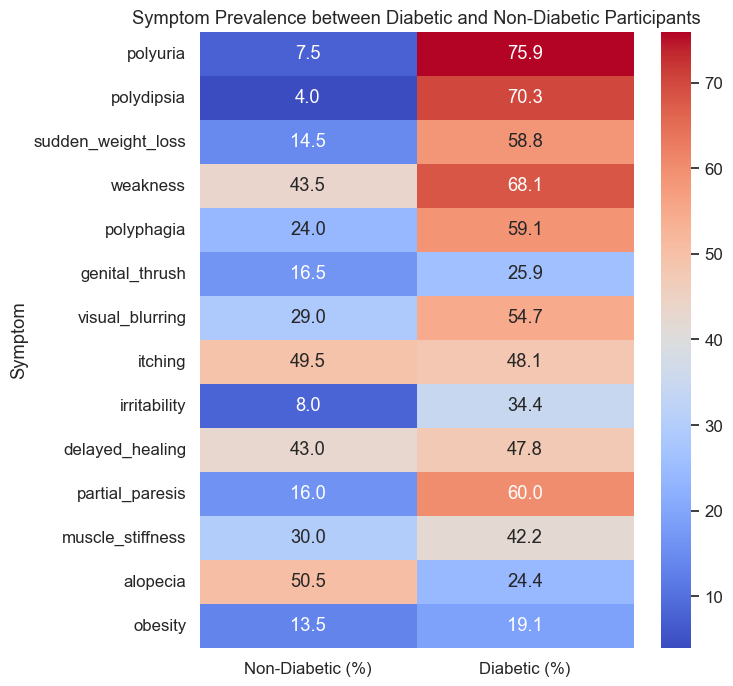

In [72]:
#  Visualization: heatmap of symptom prevalence 
plt.figure(figsize=(7,8))
sns.heatmap(crosstab_class, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Symptom Prevalence between Diabetic and Non-Diabetic Participants")
plt.ylabel("Symptom")
plt.savefig("symptom_prevalence_diabetic_non_diabetic_participants.png", dpi=150)
plt.show()


In [62]:
# Gender-based symptom patterns among diabetics
print("\n=== Symptom Differences by Gender (Diabetic Patients Only) ===\n")



=== Symptom Differences by Gender (Diabetic Patients Only) ===



In [63]:
# Subset diabetics only
df_diabetic = df[df["class"] == 1]


In [64]:
# Compute symptom frequencies by gender
crosstab_gender = df_diabetic.groupby("gender")[symptom_cols].mean().T * 100
display(crosstab_gender.round(1))

gender,Female,Male
polyuria,74.6,77.6
polydipsia,72.3,68.0
sudden_weight_loss,65.9,50.3
weakness,67.6,68.7
polyphagia,65.9,51.0
genital_thrush,9.8,44.9
visual_blurring,60.1,48.3
itching,50.3,45.6
irritability,27.2,42.9
delayed_healing,50.9,44.2


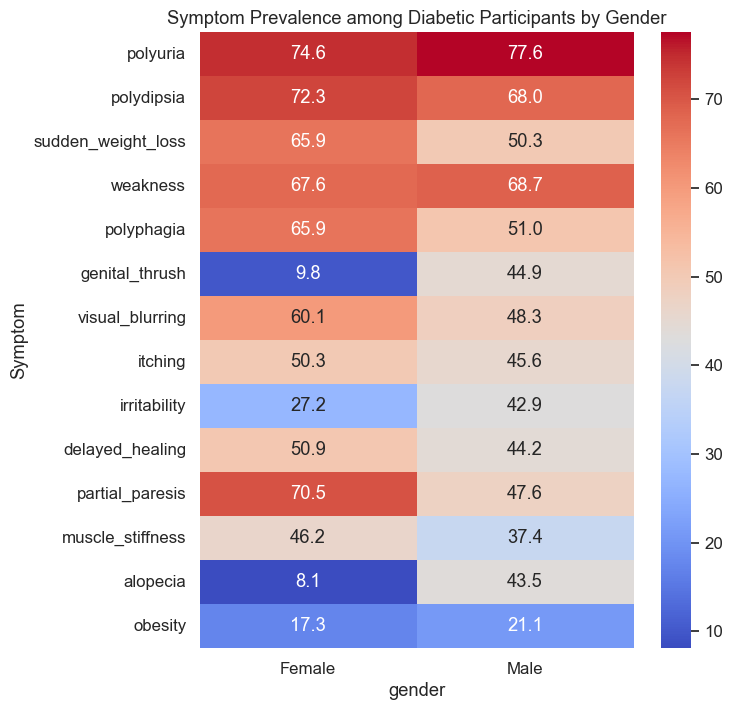

In [73]:
#  Visualization: heatmap of gender differences 
plt.figure(figsize=(7,8))
sns.heatmap(crosstab_gender, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Symptom Prevalence among Diabetic Participants by Gender")
plt.ylabel("Symptom")
plt.savefig("symptom_prevalence_among_diabetic_by_gender.png", dpi=150)
plt.show()

In [66]:
print("\n=== Preliminary Insights ===\n")



=== Preliminary Insights ===



In [67]:
# Most common symptoms among diabetics
common_symptoms = df_diabetic[symptom_cols].mean().sort_values(ascending=False) * 100
print("Top 5 Most Common Symptoms among Diabetic Individuals (%):")
display(common_symptoms.head(5))

Top 5 Most Common Symptoms among Diabetic Individuals (%):


polyuria           75.9375
polydipsia         70.3125
weakness           68.1250
partial_paresis    60.0000
polyphagia         59.0625
dtype: float64

In [68]:
# Gender-based differences
diff_by_gender = (crosstab_gender["Male"] - crosstab_gender["Female"]).abs().sort_values(ascending=False)
print("Symptoms with Largest Gender Differences (Absolute % Difference):")
display(diff_by_gender.head(5))

Symptoms with Largest Gender Differences (Absolute % Difference):


alopecia              35.444929
genital_thrush        35.071370
partial_paresis       22.901184
irritability          15.689513
sudden_weight_loss    15.555818
dtype: float64

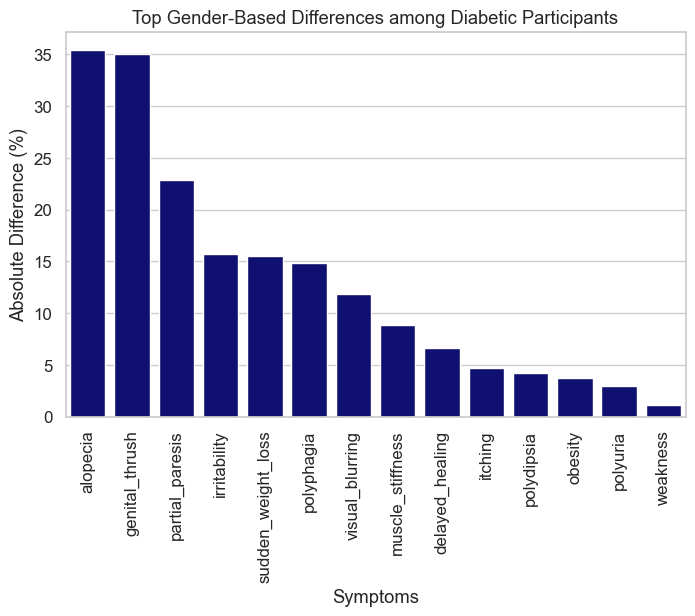

In [74]:
# Visualization: barplot of gender differences 
plt.figure(figsize=(8,5))
sns.barplot(x=diff_by_gender.index, y=diff_by_gender.values, color="navy")
plt.xticks(rotation=90)
plt.ylabel("Absolute Difference (%)")
plt.xlabel("Symptoms")
plt.title("Top Gender-Based Differences among Diabetic Participants")
plt.savefig("top_gender_differences_among_diabetic.png", dpi=150)
plt.show()


In [70]:
print("\n=== Summary Observations ===")
print(f"- Mean participant age: {df['age'].mean():.1f} years.")
print(f"- Males make up {gender_dist['Male']:.1f}% of participants.")
print(f"- Overall diabetes prevalence: {diabetes_prevalence:.1f}%.")
print(f"- Among diabetics, most frequent symptoms: {', '.join(common_symptoms.head(3).index)}.")
top_diff = diff_by_gender.head(3)
print(f"- Symptoms with greatest gender-based variation: {', '.join(top_diff.index)}.")


=== Summary Observations ===
- Mean participant age: 48.0 years.
- Males make up 63.0% of participants.
- Overall diabetes prevalence: 62.0%.
- Among diabetics, most frequent symptoms: polyuria, polydipsia, weakness.
- Symptoms with greatest gender-based variation: alopecia, genital_thrush, partial_paresis.
